# Data Training and Testing

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from sklearn.metrics import \
    classification_report, \
    plot_confusion_matrix, \
    confusion_matrix, \
    roc_curve, \
    auc

In [20]:
def load_data(path) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df

def plot_ROC(y_test, y_pred, plt_config):    
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=plt_config['figsize'])
        plt.title('ROC')
        plt.plot(fpr, tpr, 'b', label='ROC-AUC = %0.2f' % roc_auc)
        plt.plot([0,1], [0,1], 'y--', label='baseline')

        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc='best')
        plt.show()

In [3]:
df = load_data('../csv_data/user_1.csv')

In [4]:
df

,timestamp,dist_s,angle_s,mean_dist,average_mouse_speed,useful,useless,class
0,2022-04-15 19:28:49,263.674,69.3421,5316.49,0,0,0,2
1,2022-04-15 19:28:52,521.615,0.0000,5034.37,0,0,1,2
2,2022-04-15 19:28:53,1155.380,0.0000,5892.10,0,0,2,2
3,2022-04-15 19:28:54,1329.600,0.0000,6705.91,0,0,0,2
4,2022-04-15 19:28:55,1369.910,70.4558,6572.16,0,0,1,2
...,...,...,...,...,...,...,...,...
9727,2022-04-15 22:27:02,0.000,0.0000,NaN,31,0,4,2
9728,2022-04-15 22:27:03,0.000,0.0000,NaN,10,0,2,2
9729,2022-04-15 22:27:04,0.000,0.0000,NaN,0,0,0,2
9730,2022-04-15 22:27:05,0.000,0.0000,NaN,0,0,0,2


<AxesSubplot:ylabel='Frequency'>

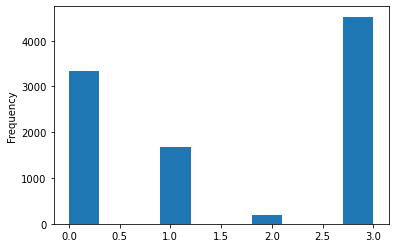

In [5]:
df['class'].plot.hist()

In [6]:
df = df.fillna(0)
data_X = df.drop(columns = ['timestamp', 'class'])
data_y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3)

In [8]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.42      0.62      0.50       963
           1       0.20      0.08      0.11       536
           2       0.20      0.02      0.03        57
           3       0.58      0.55      0.56      1364

    accuracy                           0.48      2920
   macro avg       0.35      0.32      0.30      2920
weighted avg       0.45      0.48      0.45      2920



In [10]:
# try to do binary classification
data_X = data_X
binary_data_y = data_y.copy()
binary_data_y[binary_data_y>0] = 1

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_X, binary_data_y, test_size=0.3)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.45      0.29      0.35      1015
           1       0.68      0.81      0.74      1905

    accuracy                           0.63      2920
   macro avg       0.57      0.55      0.55      2920
weighted avg       0.60      0.63      0.61      2920



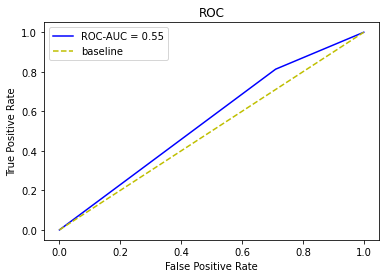

In [21]:
plt_config = {
    'figsize': (6, 4),
    # 'model': ad.mode + ' Detection'
}

plot_ROC(y_test, y_hat, plt_config)